In [33]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model

from tensorflow.keras import preprocessing
from tensorflow.keras import backend as K
from tensorflow.keras import models

import tensorflow as tf
import numpy as np

image_size = 224

# Load pre-trained Keras model and the image to classify
model = tf.keras.applications.vgg16.VGG16()
image = np.random.random((image_size, image_size, 3))
img_tensor = preprocessing.image.img_to_array(image)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor = preprocess_input(img_tensor)

conv_layer = model.get_layer("block5_conv3")
heatmap_model = models.Model([model.inputs], [conv_layer.output, model.output])

# Get gradient of the winner class w.r.t. the output of the (last) conv. layer
with tf.GradientTape() as gtape:
    conv_output, predictions = heatmap_model(img_tensor)
    print(predictions)
    loss = predictions[:, np.argmax(predictions[0])]
    print(loss)
    grads = gtape.gradient(loss, conv_output)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))

heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
heatmap = np.maximum(heatmap, 0)
max_heat = np.max(heatmap)
if max_heat == 0:
    max_heat = 1e-10
heatmap /= max_heat

print(heatmap.shape)

tf.Tensor(
[[1.53621106e-04 2.05050944e-03 4.57099173e-04 3.56095989e-04
  2.05979706e-03 6.82923594e-04 3.24128603e-04 2.74705701e-04
  1.99022426e-04 4.44055360e-04 3.22578999e-04 1.81288546e-04
  1.06533946e-04 1.50633699e-04 6.12904478e-05 1.29336215e-04
  1.62588942e-04 1.63018311e-04 1.75391382e-04 1.44909864e-04
  2.14210479e-04 2.05618519e-04 6.94504764e-04 3.86830216e-04
  3.43478081e-04 5.24684845e-04 4.38818155e-04 6.18297956e-04
  8.69267678e-04 7.50959211e-04 2.23874813e-04 2.27385759e-03
  4.19840188e-04 3.07528913e-04 2.38655112e-03 1.11517271e-04
  1.92146093e-04 5.55815750e-05 9.83782345e-04 3.86537431e-04
  4.20097291e-04 1.52454115e-04 3.70970811e-04 2.98563828e-04
  3.01859254e-04 2.67539639e-04 4.43722587e-04 4.39605181e-04
  1.69277002e-04 1.96032168e-04 2.96745508e-04 4.14619572e-04
  3.90556699e-04 9.70947614e-04 8.36263993e-04 1.10446080e-03
  4.16658964e-04 1.16472547e-04 1.55107497e-04 5.64522063e-03
  3.01735802e-03 3.61582264e-04 5.67926210e-04 1.47111376e-

(1, 14, 14)


In [37]:
model.inputs

[<tf.Tensor 'input_5:0' shape=(None, 224, 224, 3) dtype=float32>]

In [38]:
conv_layer.output

<tf.Tensor 'block5_conv3_4/Identity:0' shape=(None, 14, 14, 512) dtype=float32>

In [39]:
model.output

<tf.Tensor 'predictions_4/Identity:0' shape=(None, 1000) dtype=float32>

In [35]:
img_tensor.shape

(1, 224, 224, 3)

In [42]:
conv_output

<tf.Tensor: shape=(1, 14, 14, 512), dtype=float32, numpy=
array([[[[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
          0.       ],
         [0.       , 0.       , 0.       , ..., 0.       , 1.2560279,
          0.       ],
         [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
          0.       ],
         ...,
         [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
          0.       ],
         [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
          0.       ],
         [0.       , 0.       , 0.       , ..., 0.       , 3.3158875,
          0.       ]],

        [[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
          0.       ],
         [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
          0.       ],
         [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
          0.       ],
         ...,
         [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
          0.  

In [41]:
predictions

<tf.Tensor: shape=(1, 1000), dtype=float32, numpy=
array([[1.53621106e-04, 2.05050944e-03, 4.57099173e-04, 3.56095989e-04,
        2.05979706e-03, 6.82923594e-04, 3.24128603e-04, 2.74705701e-04,
        1.99022426e-04, 4.44055360e-04, 3.22578999e-04, 1.81288546e-04,
        1.06533946e-04, 1.50633699e-04, 6.12904478e-05, 1.29336215e-04,
        1.62588942e-04, 1.63018311e-04, 1.75391382e-04, 1.44909864e-04,
        2.14210479e-04, 2.05618519e-04, 6.94504764e-04, 3.86830216e-04,
        3.43478081e-04, 5.24684845e-04, 4.38818155e-04, 6.18297956e-04,
        8.69267678e-04, 7.50959211e-04, 2.23874813e-04, 2.27385759e-03,
        4.19840188e-04, 3.07528913e-04, 2.38655112e-03, 1.11517271e-04,
        1.92146093e-04, 5.55815750e-05, 9.83782345e-04, 3.86537431e-04,
        4.20097291e-04, 1.52454115e-04, 3.70970811e-04, 2.98563828e-04,
        3.01859254e-04, 2.67539639e-04, 4.43722587e-04, 4.39605181e-04,
        1.69277002e-04, 1.96032168e-04, 2.96745508e-04, 4.14619572e-04,
        3.905

In [40]:
np.argmax(predictions[0])

644

In [36]:
heatmap_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [29]:
predictions.shape

TensorShape([1, 1000])

In [28]:
np.argmax(predictions[0])

644

In [10]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [14]:
import matplotlib.pyplot as plt

In [20]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model

from tensorflow.keras import preprocessing
from tensorflow.keras import backend as K
from tensorflow.keras import models

import tensorflow as tf
import numpy as np

image_size = 224

# Load pre-trained Keras model and the image to classify
model = tf.keras.applications.vgg16.VGG16()
image = np.random.random((image_size, image_size, 3))
img_tensor = preprocessing.image.img_to_array(image)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor = preprocess_input(img_tensor)

conv_layer = model.get_layer("block5_conv3")
heatmap_model = models.Model([model.inputs], [conv_layer.output, model.output])

# Get gradient of the winner class w.r.t. the output of the (last) conv. layer
with tf.GradientTape() as gtape:
    conv_output, predictions = heatmap_model(img_tensor)
    loss = predictions[:, np.argmax(predictions[0])]
    grads = gtape.gradient(loss, conv_output)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))

heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
heatmap = np.maximum(heatmap, 0)
max_heat = np.max(heatmap)
if max_heat == 0:
    max_heat = 1e-10
heatmap /= max_heat

print(heatmap.shape)

(1, 14, 14)


In [21]:
heatmap[0].shape

(14, 14)

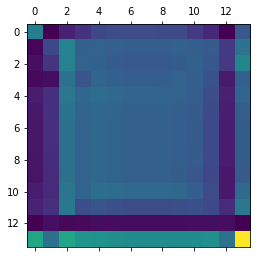

In [22]:
plt.matshow(heatmap[0])
plt.show()

In [43]:
heatmap

array([[[0.43217573, 0.        , 0.09716377, 0.1448245 , 0.22281413,
         0.24154343, 0.24100938, 0.24080525, 0.23778652, 0.23257343,
         0.16676259, 0.11920618, 0.        , 0.27681172],
        [0.01869408, 0.22551069, 0.45848778, 0.31988007, 0.31926233,
         0.31370232, 0.3100133 , 0.30973542, 0.30941257, 0.3142479 ,
         0.30894038, 0.29238752, 0.17364751, 0.3840888 ],
        [0.04181487, 0.15550308, 0.44952562, 0.326433  , 0.31813824,
         0.29710883, 0.28540018, 0.28496796, 0.2848723 , 0.29757315,
         0.3148535 , 0.27595544, 0.16809227, 0.4670504 ],
        [0.02574837, 0.03914649, 0.38628522, 0.27129373, 0.3311731 ,
         0.31720054, 0.3078655 , 0.3075483 , 0.30833206, 0.3209149 ,
         0.30260316, 0.254209  , 0.07107731, 0.31602424],
        [0.07992895, 0.14427346, 0.40782946, 0.34156242, 0.35788327,
         0.3457823 , 0.3302504 , 0.33049256, 0.32721883, 0.32337236,
         0.30600354, 0.2421157 , 0.09518083, 0.33223307],
        [0.0686375 ,